<h1><center><u><font color="red">Tutorial 3 </font></u> </center></h1> 

<h1><center><font color="blue"> Match Filter SNR </font></center></h1>



The Signal to Noise Ratio (SNR) for a binary coalescing at timetcis calculated

<Br>

\begin{equation}
SNR \; (S, h)= 4 \;Re \; \int_{f_{min}}^{f_{max}} \frac{ \tilde s(f) \; \tilde h(f)^* }{ \tilde S_n(f)}  df
\end{equation}

<Br>

Time domain Signal

\begin{equation}
s(t) =  h(t) + n(t)
\end{equation}

<Br>

Frequency domain Signal

\begin{equation}
\tilde s(f) = \tilde h(f) + \tilde n(f)
\end{equation}


<u> <font color="magenta">Notations </font></u>


| Defination | Math Symbol | Python Variable |
| --- | --- | --- |
| Time domain Template | $h(t)$ | hoft |
| Time domain Noise | $n(t)$ | noft |
| Time domain Signal  | $s(t)$ | soft |
| Frequency domain Template | $ \tilde h(f)$  | hf |
| Conjugate of frequency domain Template | $ \tilde h(f)^*$  | hfconju |
| Frequency domain Noise  | $ \tilde n(f) $ | nf |
| Frequency domain Signal   | $ \tilde s(f) $ | sf |
| Noise power spectral density | $ \tilde S_n(f) $ | psdn |
| Lower frequency  | $ f_{min} $ | fmin |
| Higher frequency | $ f_{max} $ | fmax |
| Sampling frequency | $ fs $ | fs |
| Frequency step     | $ df $ | deltaF|
| Signal normalized constant | $ h_o $ | hnot |

In [0]:
import numpy as np
import matplotlib.pyplot as plt

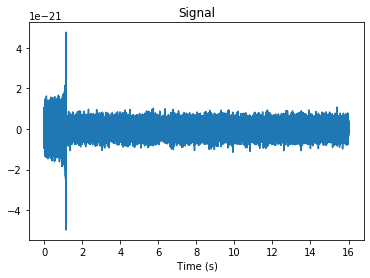

In [60]:
# Load data from the file

# Template: Time domain Newtownian Chirp Signal
ghoft = np.genfromtxt('https://github.com/Sudhagar7/GW_tutorials/blob/master/nchirp.dat',delimiter=',')
# Time axis from the Time domain Newtownian Chirp Signal
time_axis = ghoft[:, 0]
# Template i.e Time domain Newtownian Chirp Signal
hoft = ghoft[:, 1]

# Noise: Gaussian Noise
gnoise = np.genfromtxt('noise_td.dat',delimiter=',')
# Noise Column from data
noft = gnoise[:, 1]

# Noise Power Spectral Density
psdn = np.genfromtxt('psd.dat')

plt.figure()
plt.plot(time_axis, (hoft+noft))
plt.title( "Signal")
plt.xlabel(" Time (s)")
plt.show()

In [0]:
# Time steps from data
deltaT = abs(time_axis[0]-[1])

# Duration of the time domain signal
T = int(np.ceil(time_axis[-1]-time_axis[0]))

# Sampling Frequency
sampFre = int(len(time_axis)/T)

# Minimum Frequency 
flower = 30 # Hz

# Maximum Frequency
fhigher = int(sampFre/2)

In [0]:
def gIndices(fmin, fmax, deltaF):
    """
    Get Index of Minimum Frequency and Maximum Frequency
    
    Parameters
    ----------
    fmin: integer
          Minimum Frequency
    
    fmax: integer
          Maximum Frequency

    Returns
    -------
    minInd: integer
            Minimum Frequency Index

    maxInd: integer
            Maximum Frequency Index
    """
    minInd, maxInd = int(1.0*fmin/deltaF), int(1.0*fmax/deltaF)

    return minInd, maxInd


In [0]:
def sigma(template, psd, fmin, fmax, deltaF, fs):
    """
    Normalization factor of the template

    Parameters
    ----------
    template: array-like
              Time domain of template
    
    psd: array-like
         Noise Power Spectral Density

    fmin: float
          Minimum Frequency

    fmax: float
          Maximum Frequency

    deltaF: float
            Frequency Step
    
    fs: integer
        Sampling Frequency

    Return:
    hnot: float
          Normalization factor of the template
    """
    # Get Min and Max index
    kmin, kmax = gIndices(fmin, fmax, deltaF)

    # Convert Time domain template to frequency domain template
    ht   = np.fft.rfft(template)

    # Norm
    hnot =  np.sqrt(4.0*deltaF*(np.abs(ht[kmin:kmax])**2./psd[kmin:kmax]).sum())/fs
    return hnot

In [0]:
def mfsnr(template, data, psd, fmin, fmax, deltaF, fs):
    """
    Match Filter SNR

    Parameters
    ----------
    template: array-like
              Frequency domain of template (hf)
    
    data: array-like
          Frequency domain of template (sf)

    psd: array-like
         Noise Power Spectral Density 

    fmin: float
          Minimum Frequency

    fmax: float
          Maximum Frequency

    deltaF: float
            Frequency Step
    
    fs: integer
        Sampling Frequency
    """
    # Get Min and Max index
    kmin, kmax = gIndices(fmin, fmax, deltaF)
    
    # Applying the matched filter
    matched_filter = 2*np.fft.ifft(data[kmin:kmax] * template[kmin:kmax].conjugate()/psd[kmin:kmax])
    SNR_matched = np.sqrt(np.abs(matched_filter)/fs)

    # Optimal filter 
    optimal_filter = 2*np.fft.ifft(template[kmin:kmax] * template[kmin:kmax].conjugate()/psd[kmin:kmax])
    SNR_template = np.sqrt(np.abs(optimal_filter)/fs)

    print ("SNR_matched   :", np.max(SNR_matched))
    print ("SNR_template  :", np.max(SNR_template))

    return

<u> <font color="magenta"> Optimal Match filter </font> </u>

$\tilde S(f) = \tilde h(f)$
<Br>
\begin{equation}
SNR \; (h, h)= 4 \;Re \; \int_{f_{min}}^{f_{max}} \frac{ \tilde h(f) \; \tilde h(f)^* }{ \tilde S_n(f)}  df \\
\end{equation}
<Br>

In [65]:
# Normalize the the template
hnot  = sigma(template=hoft, psd=psdn, fmin=flower, fmax=fhigher, deltaF=1/T,fs=sampFre)

# Normalized template
hoft = hoft/hnot

# Signal S(t) = h(t)
soft = hoft

# Convert Time domain signal to frequency domain signal
hf = np.fft.rfft(hoft)

# Convert Time domain signal to frequency domain signal
sf = np.fft.rfft(soft)

# Match Filter
mfsnr(template=hf, data=sf, psd=psdn, deltaF=1/T, fmin=flower, fmax=fhigher, fs=sampFre)

SNR_matched   : 1.0074056800328939
SNR_template  : 1.0074056800328939


<u> <font color="green"> Check points of your results </font> </u>

SNR_matched   : 1.0074056800328939

SNR_template  : 1.0074056800328939

<u> <font color="magenta"> Match filter</font> </u>
<Br>
\begin{equation}
SNR \; (S, h)= 4 \;Re \; \int_{f_{min}}^{f_{max}} \frac{ \tilde S(f) \; \tilde h(f)^* }{ \tilde S_n(f)}  df
\end{equation}
<Br>

In [66]:
# Signal S(t) = h(t) + n(t)
soft = hoft + noft

# Convert Time domain signal to frequency domain signal
hf = np.fft.rfft(hoft)

# Convert Time domain signal to frequency domain signal
sf = np.fft.rfft(soft)

# Match Filter
mfsnr(template=hf, data=sf, psd=psdn, deltaF=1/T, fmin=flower, fmax=fhigher, fs=sampFre)

SNR_matched   : 2.042457098763159
SNR_template  : 1.0074056800328939


<h3><center><u> <font color="brown"> Coding help in Python 3 </font> </u></center><h3>

* Data Types Examples
  * integers:  -10, 10
  * float:  -10. , 10.0, 23.5

* Division operators
  * '/' 
         Ex: 6/4 = 1.5
  * '//' 
         Ex: 6//4 = 1  (Quotient)
  * '%'  
         Ex: 6%4 = 2 (Reminder)

* Multiplication operator
  * '*'  
         Ex: 6  * 4 = 24  (Integer)
         Ex: 6. * 4 = 24.0 (Float)
* Power operator
  * '**'
         Ex: 6 ** 4 = 1296 (Integer)
         Ex: 6 ** 4. = 1296.0 (Float)

* np.pi


* Array index examples 

  In python array index starts from zero (0 1 2 3 ,...)

  \>\>\> x  = [10 20 30 40 50 60 70 80 90 100]

           [0 1  2 3 4 5 6 7 8 9]

  \>\>\> y  = x[3:6]

  \>\>\> y = [40 50 60]

 
 * Fast Fourier Transform (FFT)
  
  np.fft.fft()

* Inverse Fast Fourier Tansform (IFTT)
  
  np.fft.ifft()

* Shift FFT
  
  np.fft.shift()

* Fast Fourier Transform (FFT) - Poistive
 
  np.fft.rfft()
  
 